Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)  

Доп. задание. Сделать тоже самое, но с учетом отсеивания по сроку сдачи. Критерии отсеивания выбрать самостоятельно


2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. 

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3).

5. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.
*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Файлы: 

##### assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

##### courses.csv — файл содержит список предметов по семестрам.
code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

##### studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

##### studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests 
from urllib.parse import urlencode
import math
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(
    font_scale = 2,
    style       ="whitegrid",
    rc          ={'figure.figsize':(20, 7)}
)

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key_1 = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
public_key_2 = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw'
public_key_3 = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA'
public_key_4 = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw'
final_url_1 = base_url + urlencode(dict(public_key=public_key_1)) 
final_url_2 = base_url + urlencode(dict(public_key=public_key_2))
final_url_3 = base_url + urlencode(dict(public_key=public_key_3))
final_url_4 = base_url + urlencode(dict(public_key=public_key_4))
response_1 = requests.get(final_url_1)
response_2 = requests.get(final_url_2)
response_3 = requests.get(final_url_3)
response_4 = requests.get(final_url_4)
download_url_1 = response_1.json()['href'] 
download_url_2 = response_2.json()['href'] 
download_url_3 = response_3.json()['href']
download_url_4 = response_4.json()['href']
assessments =       pd.read_csv(download_url_1, sep=',')
courses =   pd.read_csv(download_url_2, sep=',')
studentAssessment = pd.read_csv(download_url_3, sep=',')
studentRegistration = pd.read_csv(download_url_4, sep=',')

In [3]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [5]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


### Для общего понимания выведем основную информацию по каждой из таблиц

In [7]:
print('Длина assessments:', len(assessments), '\nДлина courses:', len(courses), '\nДлина studentAssessment:', 
                                    len(studentAssessment), '\nДлина studentRegistration:', len(studentRegistration))


Длина assessments: 206 
Длина courses: 22 
Длина studentAssessment: 173912 
Длина studentRegistration: 32593


In [8]:
a = [assessments, courses, studentAssessment, studentRegistration]
for i in a:
    print(i.duplicated().sum())

0
0
0
0


In [9]:
for i in a:
    print(i.isna().sum())

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [10]:
for i in a:
    print(i.isna().mean())

code_module          0.000000
code_presentation    0.000000
id_assessment        0.000000
assessment_type      0.000000
date                 0.053398
weight               0.000000
dtype: float64
code_module                   0.0
code_presentation             0.0
module_presentation_length    0.0
dtype: float64
id_assessment     0.000000
id_student        0.000000
date_submitted    0.000000
is_banked         0.000000
score             0.000995
dtype: float64
code_module            0.000000
code_presentation      0.000000
id_student             0.000000
date_registration      0.001381
date_unregistration    0.690977
dtype: float64


In [11]:
for i in a:
    print(i.dtypes)

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object
id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object
code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object


### Определим, что такое курс

В условии сказано, что у студентов, окончивших курс, поле в столбце "date_unregistration" остается пустым.  Проверим, сколько процентов зарегистрировавшихся окончили курс 
##### не значит что окончили успешно
Вывод: Видим, что 69% из таблицы окончили курсы, на которые записались (если за курс считать предмет + отдельный семестр)

In [12]:
studentRegistration.date_unregistration.isna().mean()

0.6909765900653515

In [13]:
studentRegistration.date_unregistration.value_counts() # более всего отменяли регистрацию на 12ый день

 12.0     788
 0.0      419
 27.0     170
-1.0      147
-2.0       99
         ... 
 232.0      1
-197.0      1
-27.0       1
-192.0      1
-157.0      1
Name: date_unregistration, Length: 416, dtype: int64

Для определения что является курсом попробуем посмотреть, сколько семестров в каждом предмете. К сожалению, мы не сможем выяснить очередность семестров и есть ли она вообще, но далее сможем посмотреть, может ли студент поступить на один семестр внутри предмета без сдачи других курсов этого предмета. Также есть вариант, при котором курс - сдача всех предметов, которые предусмотрены внутри одного семестра.

In [14]:
courses.groupby('code_module', as_index = False).agg(uniq_presentation = ('code_presentation','unique'))

,code_module,uniq_presentation
0,AAA,"[2013J, 2014J]"
1,BBB,"[2013J, 2014J, 2013B, 2014B]"
2,CCC,"[2014J, 2014B]"
3,DDD,"[2013J, 2014J, 2013B, 2014B]"
4,EEE,"[2013J, 2014J, 2014B]"
5,FFF,"[2013J, 2014J, 2013B, 2014B]"
6,GGG,"[2013J, 2014J, 2014B]"


Т.к по условию успешная сдача курса - сдача экзаменов, предлагаю посмотреть, все ли предметы + семетры имеют экзамены.
Вывод: предположительно экзамены должны быть везде, а в случае с предметом CCC - 2 экзамена

In [15]:
assessments.query('assessment_type == "Exam"') \
           .groupby(['code_module', 'code_presentation'], as_index = False) \
           .agg(count_of_ex = ('assessment_type', 'count'))

,code_module,code_presentation,count_of_ex
0,AAA,2013J,1
1,AAA,2014J,1
2,BBB,2013B,1
3,BBB,2013J,1
4,BBB,2014B,1
5,BBB,2014J,1
6,CCC,2014B,2
7,CCC,2014J,2
8,DDD,2013B,1
9,DDD,2013J,1


In [16]:
# выяснили, что каждый предмет + семестр по идее имеет минимум 1 экзамен
len(assessments.query('assessment_type == "Exam"') \
               .groupby(['code_module', 'code_presentation'], as_index = False) \
               .agg(count_of_ex = ('assessment_type', 'count'))) == len(courses)

True

Теперь посмотрим на тоже самое, только уже из таблицы с оценками студентов, однако ее нужно приджойнить к assessments
##### Вывод: экзамен почему-то сдавался только по двум предметам (и по всем семестрам внутри этих предметов)

In [17]:
stud_asses_asses = studentAssessment.merge(assessments, how = 'inner', on = 'id_assessment')
stud_asses_asses.query('assessment_type == "Exam"') \
                .groupby(['code_module', 'code_presentation'], as_index = False) \
                .agg(count_of_ex = ('assessment_type', 'count'))

,code_module,code_presentation,count_of_ex
0,CCC,2014B,747
1,CCC,2014J,1168
2,DDD,2013B,602
3,DDD,2013J,968
4,DDD,2014B,524
5,DDD,2014J,950


Ранее мы выяснили, что по предмету CCC два экзамена. Посмотрим? есть ли среди сдававших те, кто сдавал по два экзамена по каждому предмету + семестру. Наблюдаем, что нет - по предмету CCC в каждом семестре сдавались только по одному экзамену, хотя запланировано два.

In [18]:
stud_asses_asses.query('assessment_type == "Exam"') \
                .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
                .agg(count_of_ex = ('assessment_type', 'count'))

,code_module,code_presentation,id_assessment,count_of_ex
0,CCC,2014B,24290,747
1,CCC,2014J,24299,1168
2,DDD,2013B,25340,602
3,DDD,2013J,25354,968
4,DDD,2014B,25361,524
5,DDD,2014J,25368,950


#### На данный момент мы выяснили, что если верить условию, в теории можно было успешно завершить только курсы по предмету CCC и DDD, т.к по остальным предметам экзамены никто не сдавал.
###### Однако на данный момент я еще не определился до конца с тем, что является курсом. Учитывая, что в таблице courses за курс явно понимается предмет + семестр и в самом первом вопросе содержится подсказка, что успешная сдача курса - успешная сдача экзамена по курсу, скорее всего это так, однако разберу еще два возможных варианта.
1) Курс - предмет + семестр  
2) Курс - предмет и 2+ семестра внутри предмета  
3) Курс - все предметы внутри семестра

Для опровержения второга пункта (предмет и 2+ семестра внутри предмета), посмотрим на таблицу с регистрациями. По логике. студент должен был регистрироваться сразу на два семестра. А даже если и нет, то в каких-то семестрах всегда должны быть семестры внутри предмета, на которые записалось больше человек чем на следующий семестр (т.к во втором семестре явно кто-то отсеивается)

In [19]:
# оставил только тех, кто регался 2+ раза

table_reg = studentRegistration.groupby(['id_student', 'code_module'], as_index = False) \
                               .agg(uniq_presentation = ('code_presentation', 'nunique')) \
                               .query('uniq_presentation >=2') \
                               .merge(studentRegistration, how = 'inner', on = ['id_student', 'code_module']) \
                               .groupby(['id_student', 'code_module'], as_index = False) \
                               .agg(uniq_presentation = ('code_presentation', 'unique'))
table_reg.head()

,id_student,code_module,uniq_presentation
0,8462,DDD,"[2013J, 2014J]"
1,24213,DDD,"[2013B, 2014B]"
2,25629,BBB,"[2013J, 2014B]"
3,27417,DDD,"[2013J, 2014J]"
4,27891,BBB,"[2013B, 2014B]"


In [20]:
table_reg.query('code_module == "DDD"').head(10)

,id_student,code_module,uniq_presentation
0,8462,DDD,"[2013J, 2014J]"
1,24213,DDD,"[2013B, 2014B]"
3,27417,DDD,"[2013J, 2014J]"
5,31269,DDD,"[2013J, 2014B]"
6,33387,DDD,"[2013J, 2014J]"
8,33681,DDD,"[2013J, 2014J]"
9,33897,DDD,"[2013J, 2014J]"
10,34087,DDD,"[2013J, 2014J]"
13,40419,DDD,"[2013B, 2013J]"
17,53632,DDD,"[2014B, 2014J]"


#### Внимательно посмотрев таблицу, я увидел, что нет единой системы, определяющей последовательность семестров. Мы не можем знать, какой семестр начался раньше (т.к  у нас нет дат, только дни до/от начала семестра), поэтому ладе если встречаются 2013J, 2013 B, а потом 2013B, 2013J мы не можем утверждать, что это не случайная последовательность. Однако есть пары, например, такие как 2013J, 2014B (id_student 31269) и 2013J, 2014J (id_student 33387). Таким образом, гипотеза о том, что за курс можно принять 2+ семестра внутри одного предмета - не подтвердилась, т.к тогда была бы какая-то единая последовательность. Можно придумать и этому обоснование при желании, однако первый вариант (Курс - предмет + семестр) намного более вероятен

Теперь опровергнем 3ью гипотезу о том, что такое курс (Курс - все предметы внутри семестра)

In [21]:
courses.groupby('code_presentation', as_index = False).agg({'code_module' : 'unique'})

,code_presentation,code_module
0,2013B,"[BBB, DDD, FFF]"
1,2013J,"[AAA, BBB, DDD, EEE, FFF, GGG]"
2,2014B,"[BBB, CCC, DDD, EEE, FFF, GGG]"
3,2014J,"[AAA, BBB, CCC, DDD, EEE, FFF, GGG]"


Предварительный вывод по гипотезе 3:
Из предметов, которые попадаются во все семестры - это DDD, однако экзамены сдавались только по DDD и CCC. Мы можем предположить, что достаточно сдать экзамен по DDD (а если в семестре есть CCC - то и по нему), что бы успешно завершить курс, который в данном случае понимается как окончание каждого предмета + сдача экзамена по DDD (а где есть - еще и по CCC) внутри семестра. Однако прежде посчитаем, сколько учеников окончили каждый предмет хотя бы семестра 2013B

In [22]:
studentRegistration.query('date_unregistration == "NaN" and code_presentation == "2013B"') \
                   .groupby('id_student', as_index = False) \
                   .agg(count_module = ('code_module', 'nunique')).query('count_module >= 2')

,id_student,count_module


In [23]:
studentRegistration.query('date_unregistration == "NaN" and code_presentation == "2013J"') \
                   .groupby('id_student', as_index = False) \
                   .agg(count_module = ('code_module', 'nunique')).query('count_module >= 2')

,id_student,count_module
1024,390029,2


In [24]:
studentRegistration.query('date_unregistration == "NaN" and code_presentation == "2014B"') \
                   .groupby('id_student', as_index = False) \
                   .agg(count_module = ('code_module', 'nunique')).query('count_module >= 2') \
                   .sort_values('count_module', ascending = False)

,id_student,count_module
13,29820,2
3467,626516,2
3251,624441,2
3265,624591,2
3286,624782,2
...,...,...
1796,577245,2
1800,577352,2
1830,578958,2
1899,585393,2


In [25]:
studentRegistration.query('date_unregistration == "NaN" and code_presentation == "2014J"') \
                   .groupby('id_student', as_index = False) \
                   .agg(count_module = ('code_module', 'nunique')).query('count_module >= 2') \
                   .sort_values('count_module', ascending = False)

,id_student,count_module
58,60809,2
5195,680133,2
5025,677741,2
5058,678194,2
5059,678203,2
...,...,...
3651,644246,2
3657,644369,2
3667,644480,2
3692,644974,2


### Если гипотеза о том, что курс - все предметы внутри семестра верна, то в семестре 2013B из завершивлих выбранные предметы (не обязательно успешно, т.к успех - сдача экзамена) никто не выбрал больше одного предмета, хотя надо было три. В остальных семестрах никто не выбрал больше двух предметов, хотя надо было 6-7. Данная гипотеза отвергается.

Теперь дополнительно проверим первую гипотезу от том, что курс - предмет + семестр. В assessments сказано, что weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%. Т.е если гипотеза верна - значит сумма всех возможных оценок за тест внутри курса будет равна 100

In [26]:
assessments.query('assessment_type != "Exam"') \
           .groupby(['code_module', 'code_presentation'], as_index = False) \
           .agg(sum_score = ('weight', 'sum'))

,code_module,code_presentation,sum_score
0,AAA,2013J,100.0
1,AAA,2014J,100.0
2,BBB,2013B,100.0
3,BBB,2013J,100.0
4,BBB,2014B,100.0
5,BBB,2014J,100.0
6,CCC,2014B,100.0
7,CCC,2014J,100.0
8,DDD,2013B,100.0
9,DDD,2013J,100.0


In [27]:
# проверим что с GGG. Видимо по этому предмету не велся подсчет очков
assessments.query('assessment_type != "Exam" and code_module == "GGG"').weight.value_counts()

0.0    27
Name: weight, dtype: int64

дополнительно найдем всех, кто сдал экзамен успешно и узнаем, все ли они отмечены в графе "отмена регистрации" в таблице с регистрацией, как NAN (т.е как окончившие курс). Успешная сдача экзамена - набор 40+ баллов

In [28]:
# проверим точно ли вес каждого экзамена = 100, хотя нам нужны только по предметам CCC и DDD
assessments.query('assessment_type == "Exam"').weight.value_counts()

100.0    24
Name: weight, dtype: int64

In [29]:
# ранее джойнил две таблицы
exam_score = stud_asses_asses.query('assessment_type == "Exam" and score >= 40')

In [30]:
len(studentRegistration.query('date_unregistration == "NaN"') \
                   .merge(exam_score, on = ['id_student', 'code_module', 'code_presentation'])) == len(exam_score)

True

## Путем изучения данных делаем вывод о том, что за курс будем воспринимать предмет и любой отдельный семестр. То есть курсов 22, по количеству строк в courses

# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

выясним, был ли кто-то, кто сдавал экзамен по одному и тому же курсу два раза. Ранее выяснили, что для ССС предусматривается два экзамена, но в обоих курсах сдавали по одному, поэтому в будущем будем считать сдачу одного экзамена по ССС за успешную сдачу.
Вывод: все сдавали экзамен по курсу по одному разу

In [31]:
# т.к только в ССС могло быть два экзамена, но никто два не сдавал, не группируем дополнительно по id_assessment
stud_asses_asses.query('assessment_type == "Exam"') \
                .groupby(['id_student', 'code_module', 'code_presentation'], as_index = False) \
                .size().query('size != 1')

,id_student,code_module,code_presentation,size


In [32]:
count_exam =   stud_asses_asses.query('assessment_type == "Exam" and score >= 40') \
                               .groupby('id_student', as_index = False) \
                               .agg(count_exam = ('assessment_type', 'count')) \
                               .query('count_exam == 1')
count_exam

,id_student,count_exam
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


# Ответ по первому вопросу:
# Исходя из того, что сданный курс - успешно сданный экзамен, а для успешной сдачи курса, где предмет ССС нужно сдать один экзамен из двух, успешно завершили только один курс 3802 студента. Данных подход не учитывал, например, просроченную сдачу экзамена.

## ДОП задание. Сделать тоже самое, но с учетом отсеивания по сроку сдачи. Критерии отсеивания выбрать самостоятельно
попробуем отсеить тех, кто сильно опоздал со сдачей экзамена. У нас есть данные по длинне каждого курса, а также есть данные о конечной дате, когда тест (тут - экзамен) мог быть сдан. Однако колонке с конечной датой по тесту (тут - экзамен) много NaN. Определю среднее время между длинной курса и конечной датой сдачи экзамена для того, что бы заполнить NaN в конечной дате сдачи экзамена. При этом мы не можем сразу взять тех студентов, которые сдали лишь один экзамен, поскольку среди тех, кто сдал более одного кто-то мог сдать один в разумный срок, а другой с опозданием в, например, 100 дней

In [33]:
stud_as_as_courses = stud_asses_asses.query('assessment_type == "Exam" and score >= 40') \
                                     .merge(courses, how = 'inner', on = ['code_module', 'code_presentation']) \
                                     .copy()
                                      

stud_as_as_courses.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,241
1,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,241
2,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,241
3,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,241
4,24290,560494,230,0,92.0,CCC,2014B,Exam,NaN,100.0,241


Ниже убеждаемся, что везде, где у экзамена указан конечный срок, всего несколько человек не успели вовремя сдать экзамен. При этом, максимальная задержка - 10 дней, что совсем немного (по болезни, например). Поэтому всех их я буду учитывать как сдавших экзамен.

In [34]:
stud_as_as_courses['diff'] = stud_as_as_courses['date'] - stud_as_as_courses['date_submitted']
stud_as_as_courses.query('diff != "NaN" and diff < 0')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,diff
1933,25340,532491,241,0,49.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
1958,25340,538611,241,0,51.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
2002,25340,548535,241,0,60.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
3121,25361,391924,251,0,69.0,DDD,2014B,Exam,241.0,100.0,241,-10.0
3444,25361,631388,242,0,78.0,DDD,2014B,Exam,241.0,100.0,241,-1.0
3475,25361,634383,242,0,96.0,DDD,2014B,Exam,241.0,100.0,241,-1.0


узнаем, что в дате экзамена нет NaN только в предмете DDD (но не во всех семестрах)

In [35]:
stud_as_as_courses.query('diff != "NaN"').code_module.unique()

array(['DDD'], dtype=object)

In [36]:
stud_as_as_courses.query('diff == "NaN" and code_module == "DDD"').code_presentation.unique()

array(['2014J'], dtype=object)

таким образом, в случае с DDD у нас не определена конечная дата сдачи теста только в семестре 2014J. При этом, если мы посмотрим на таблицу courses, то увидим, что предмет DDD семестр 2014J по длительности очень похож с 2013J, а 2013B с 2014B. Таким образом date (конечная дата сдачи теста/экзамена для DDD 2014J я заполню date из DDD 2013J.
Что касается CCC, т.к мне не на что ориентироваться, я буду смотреть на разницу между длинной курса и датой сдачи экзамена студентом.

In [37]:
# создаем колонку где среди тех, у кого предмет CCC из длины курса вычитаем (тоже у ССС) количество дней прошедших от начала 
#  курса до фактического срока сдачи экзамена
stud_as_as_courses['diff_for_ccc'] = stud_as_as_courses.query('code_module == "CCC"').module_presentation_length - stud_as_as_courses.query('code_module == "CCC"').date_submitted

--16 и - 25 уже кажется достаточно много

In [38]:
stud_as_as_courses.query('diff_for_ccc < 0')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,diff,diff_for_ccc
440,24290,169380,242,0,78.0,CCC,2014B,Exam,NaN,100.0,241,NaN,-1.0
655,24290,555008,266,0,56.0,CCC,2014B,Exam,NaN,100.0,241,NaN,-25.0
1672,24299,555498,285,0,58.0,CCC,2014J,Exam,NaN,100.0,269,NaN,-16.0


In [39]:
stud_as_as_courses['new_diff'] = stud_as_as_courses['diff'] # колонка diff почему-то не работает как нужно

In [40]:
# т.к DDD 2014J и DDD 2013J по продолжительности курса похожи, конечную дату сдачи курса позаимствую (261)
for_DDD_2014J = math.ceil(stud_as_as_courses.query('new_diff != "NaN" and code_module == "DDD" and code_presentation == "2013J"') \
                                             .date.mean())

# создаю df с датой конечного срока сдачи экзамена для DDD 2014J (среди DDD только они NaN в date)
stud_as_as_courses_1 = stud_as_as_courses.query('code_module == "DDD" and new_diff == "NaN"').date.fillna(for_DDD_2014J) \
                                         .reset_index()

# подготавливаю основную таблицу для джойна с таблицей выше
stud_as_as_courses = stud_as_as_courses.reset_index()

# джойню
date_DDD_2014J = stud_as_as_courses.merge(stud_as_as_courses_1, how = 'inner', on = 'index').copy()

# создаю колонку в новой таблицу с разницей между конечной датой сдачи экзамена и фактической (для DDD 2014J)
date_DDD_2014J['new_diff'] = date_DDD_2014J.date_y - date_DDD_2014J.date_submitted

# подготавливаю данные для дальнейшего объединения
stud_as_as_courses_1 = date_DDD_2014J[['index', 'new_diff']]
stud_as_as_courses_2 = stud_as_as_courses.query('new_diff != "NaN"').reset_index()[['index', 'new_diff']]
stud_as_as_courses_3 = stud_as_as_courses.query('new_diff == "NaN" and code_module == "CCC"') \
                                         .new_diff.fillna(stud_as_as_courses.diff_for_ccc).reset_index()

# Объединяю
for_merge = pd.concat([stud_as_as_courses_3, stud_as_as_courses_1, stud_as_as_courses_2])

# соединяю с основной таблицей
for_1_2 = for_merge.merge(stud_as_as_courses, how = 'inner', on = 'index') \
                   .drop(columns= ['index', 'diff', 'diff_for_ccc', 'new_diff_y']) \
                   .rename(columns ={'new_diff_x' : 'diff'}).copy()

for_1_2['diff_new'] = for_1_2['diff'] # почему-то с колонкой diff выдавало ошибку при каких-либо действиях с колонкой

# избавляюсь от лишней колонки
for_1_2 = for_1_2.drop(columns='diff')

In [41]:
for_1_2.query('code_module == "CCC" and diff_new < 0')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,diff_new
440,24290,169380,242,0,78.0,CCC,2014B,Exam,NaN,100.0,241,-1.0
655,24290,555008,266,0,56.0,CCC,2014B,Exam,NaN,100.0,241,-25.0
1672,24299,555498,285,0,58.0,CCC,2014J,Exam,NaN,100.0,269,-16.0


В случае предмета CCC, считаю обоснованным сравнивать все значения, в том числе тех, кто заранее сдал работу, поскольку это говорит о том, что ее можно было выполнить сильно заранее. Делить на семестры не вижу смысла, т.к и в том и в другоv семестре было по одному серьезному опозданию. Индекс 655 и 1672 удаляются из таблицы

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


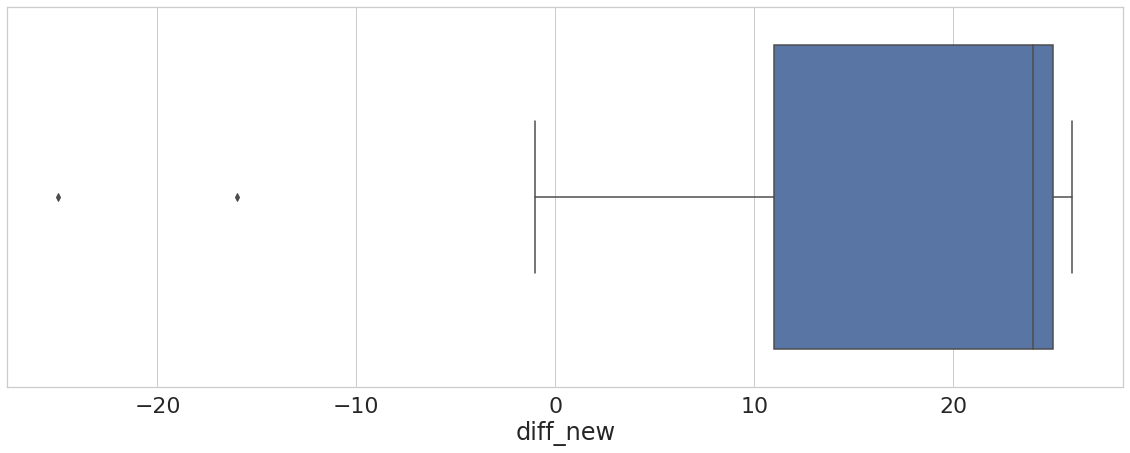

In [42]:
sns.boxplot(for_1_2.query('code_module == "CCC"')['diff_new'])

Т.к для предмета DDD я определил две разные группы (2013J, 2014J) и (2013B, 2014J), то и наблюдения я буду совершать отдельно. Индекс 1965 удаляем из финальной таблицы

In [43]:
for_1_2.query('code_module == "DDD" and (code_presentation == "2014J" or code_presentation == "2013J")  and diff_new < 0')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,diff_new
1965,25368,2341830,279,0,49.0,DDD,2014J,Exam,NaN,100.0,262,-18.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


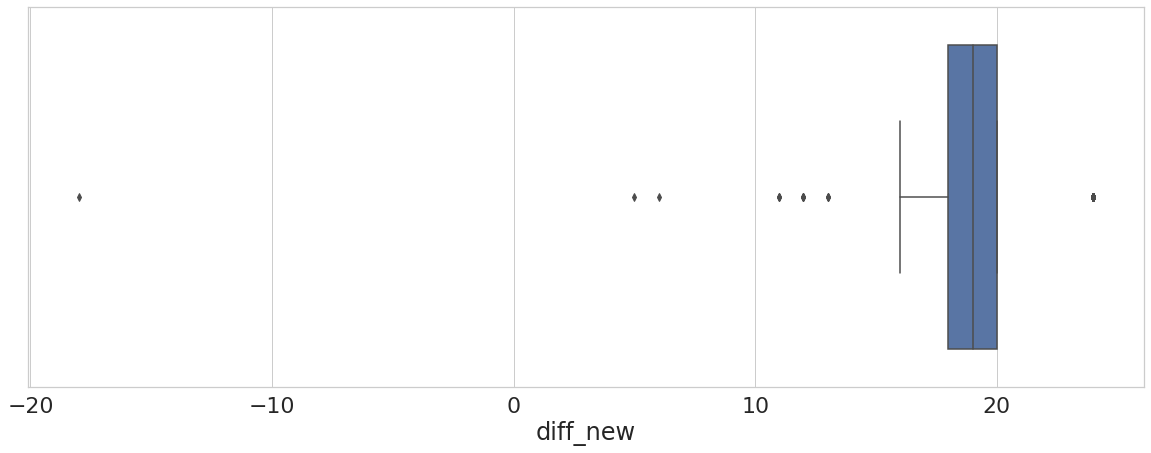

In [44]:
# не обращаю внимание, т.к важно только то, что ниже 0, а это всего одно наблюдение
sns.boxplot(for_1_2.query('code_module == "DDD" and (code_presentation == "2014J" or code_presentation == "2013J")')['diff_new'])

В других семестрах предмета DDD никого удалять не буду, потому что 10 дней хоть и значительно большая задержка, чем один день, но 10 дней легче объяснить чем, 16 или 18. 

In [45]:
for_1_2.query('code_module == "DDD" and (code_presentation == "2014B" or code_presentation == "2013B")  and diff_new < 0')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,diff_new
2775,25340,532491,241,0,49.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
2800,25340,538611,241,0,51.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
2844,25340,548535,241,0,60.0,DDD,2013B,Exam,240.0,100.0,240,-1.0
3963,25361,391924,251,0,69.0,DDD,2014B,Exam,241.0,100.0,241,-10.0
4286,25361,631388,242,0,78.0,DDD,2014B,Exam,241.0,100.0,241,-1.0
4317,25361,634383,242,0,96.0,DDD,2014B,Exam,241.0,100.0,241,-1.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


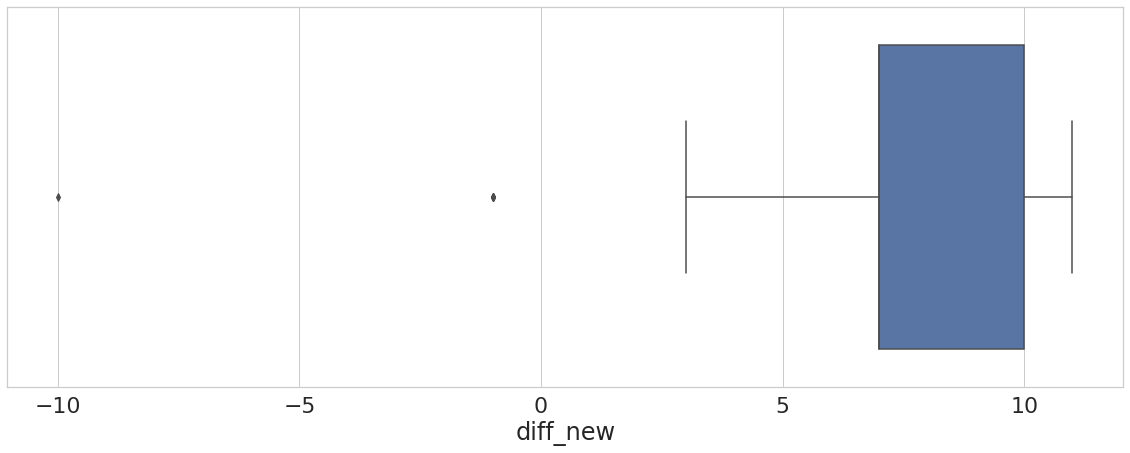

In [46]:
sns.boxplot(for_1_2.query('code_module == "DDD" and (code_presentation == "2014B" or code_presentation == "2013B")')['diff_new'])

In [47]:
a = [655, 1672, 1965]
for_1_2 = for_1_2.drop(index = a)

In [48]:
len(for_1_2.groupby('id_student', as_index = False) \
       .agg(count_exam = ('assessment_type', 'count')) \
       .query('count_exam == 1'))

3799

## Ответ на Задани 1.2:
#### Т.к по 3/4 курсов по предмету DDD были известны как дата сдачи экзамена так и максимально возможная дата сдачи экзамена, для оставшегося 1 курса по предмету DDD (2014J), у которого не была известна конечная дата сдачи экзамена, я сделал ее такой же, какая была у курса DDD семестр 2013 J, т.к у них почти одинаковая длина курса. Таким образом для всех по предмету DDD я посчитал разницу между конечной датой сдачи экзамена и фактической датой сдачи. Для CCC я посчитал разницу между длиной курса и числом дней прошедшем от начала курса до фактической сдачи. Таким образом, менее 10 человек опоздали, из них только трое опоздали серьезно. Судя по разницу (3802 - 3799 = 3) моя предостароженность насчет того, что среди тех, кто сдавал 2 курса мог быть тот, кого мы не засчитаем за сдавшеего за счет большой просрочки, в данном случае была излишне. Можно было изучить разницу между сроком курса и конечным сроком сдачи экзамена, но я выбрал иные критерии. Ответ: 799

## 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*
*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен  
При подсчете успешных сдач не буду учитыват просрочку в сдаче (как выяснили выше, по выбранному критерию, разница в 3 экзамена).  
Ранее выяснили, что никто не пытался сдать экзамен по одному и тому же курсу дважды

In [49]:
difficult_exam = stud_asses_asses.query('assessment_type == "Exam" and score >= 40') \
                .groupby(['code_module', 'code_presentation'], as_index = False) \
                .agg(count_success =('assessment_type', 'count')) \
.merge(stud_asses_asses.query('assessment_type == "Exam"') \
                .groupby(['code_module', 'code_presentation'], as_index = False) \
                .agg(count_try =('assessment_type', 'count')), how = 'inner', on = ['code_module', 'code_presentation'])

difficult_exam['how_easy_course'] =  difficult_exam['count_success'] / difficult_exam['count_try']

pd.concat([difficult_exam.sort_values('how_easy_course').head(1)[['code_module', 'code_presentation', 'how_easy_course']],
           difficult_exam.sort_values('how_easy_course').tail(1)[['code_module', 'code_presentation', 'how_easy_course']]]) \
           .set_index([pd.Index(['most_difficult_exam', 'most_easy_exam'])])

,code_module,code_presentation,how_easy_course
most_difficult_exam,DDD,2013B,0.837209
most_easy_exam,DDD,2014B,0.925573


## Ответ на 2-ое Задание:

#### Курс с наибольшей завершаемостью -  DDD 2014B - 92,56%  
#### Курс с наименьшей завершаемостью -  DDD 2013B - 83,72%

## 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Т.к ранее выяснили, что ни один из успешно сдавших экзамен не сдавал его второйр раз, на этом можно не останавливаться. Также у нас нет даты "открытия возможности сдать экзамен", поэтому мы будем считать от даты начала курса.

In [50]:
stud_asses_asses.query('assessment_type == "Exam" and score >= 40') \
                .groupby('code_module', as_index = False) \
                .agg(mean_date_submitted = ('date_submitted', 'mean')) \
                .mean_date_submitted.round() \
                .reset_index() \
                .set_index([pd.Index(['CCC', 'DDD'])]) \
                .drop(columns = 'index')

,mean_date_submitted
CCC,239.0
DDD,238.0


## Ответ на 3-ье Задание:

Если считать, что дата возможного начала сдачи экзамена открывается с начала курса, то, округлив до целого, по предмету CCC экзамен в среднем сдается за 239 дней, по предмету DDD - 238 дней.   
В данной задаче мы не учитывали данные, полученные в задании 1.2 (т.е длительная просрочка сдачи экзамена не явлалсь причиной не учитывать данный экзамен как успешно сданный.).

## 4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)

In [51]:
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Рассмотрим, нужно ли исключать те строки, где date_registration = 'NaN'.
Вывод: исключать эти строки не нужно, т.к судя по всему некоторые  из них (6/45) закончили курс, остальные же отменили регистрацию, что никак не отменяет того факта, что они были зарегистрированы

In [52]:
studentRegistration.query('date_registration == "NaN" and date_unregistration == "NaN"')

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
12893,CCC,2014J,1777834,NaN,NaN
14392,DDD,2013B,2707979,NaN,NaN
14393,DDD,2013B,2710343,NaN,NaN
17559,DDD,2014B,2710343,NaN,NaN
23796,FFF,2013B,2102658,NaN,NaN


In [53]:
popular_reg_unreg = studentRegistration.groupby(['code_module', 'code_presentation'], as_index = False) \
                   .agg(count_reg = ('id_student', 'count')) \
.merge(

studentRegistration.groupby(['code_module', 'code_presentation'], as_index = False) \
                   .agg(count_unreg = ('date_unregistration', 'count')), 
                    how=  'inner', on = ['code_module', 'code_presentation'])

pd.concat([popular_reg_unreg.sort_values('count_reg', ascending = False).head(3), 
           popular_reg_unreg.sort_values('count_unreg', ascending = False).head(3)]) \
          .set_index([pd.Index(['top_1_reg', 'top_2_reg', 'top_3_reg', 'top_1_unreg', 'top_2_unreg', 'top_3_unreg' ])])
# можно перевести из индекса в колонку - reset_index(drop = False)

,code_module,code_presentation,count_reg,count_unreg
top_1_reg,CCC,2014J,2498,1049
top_2_reg,FFF,2014J,2365,831
top_3_reg,BBB,2014J,2292,736
top_1_unreg,CCC,2014J,2498,1049
top_2_unreg,CCC,2014B,1936,898
top_3_unreg,FFF,2014J,2365,831


## Ответ на 4-ое Задание:

ТОП 3 курса по количеству регистраций:  ССС 2014J, FFF	2014J, BBB	2014J  
ТОП 3 курса по оттоку:                  CCC	2014J, CCC	2014B, FFF	2014J

Как видно, два курса (ССС 2014J, FFF 2014J попали в оба топа) 

## 5. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Возьму:  
R - средняя разница между длиной курса и длиной сдачи экзамена (измеряя от начала курса) (можем вести отсчет только от начала курса, сдача может быть и неудачной)  
F - завершаемость курсов  *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен  
M - среднее количество баллов, получаемое за экзамен  

In [54]:
stud_asses_asses.query('assessment_type == "Exam"').isna().sum()

id_assessment           0
id_student              0
date_submitted          0
is_banked               0
score                   0
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
dtype: int64

In [55]:
# Для подсчета R добавляем колонку с длиной курса
only_exam = stud_asses_asses.query('assessment_type == "Exam"') \
                            .merge(courses, how = 'inner', on = ['code_module', 'code_presentation']) \
                            .copy()

# создаем колонку с разницей между длиной курса и длиной сдачи экзамена
only_exam['diff_for_R'] = only_exam['module_presentation_length'] - only_exam['date_submitted']

# создаем функцию для того, что бы сданный экзамен отметить как 1, а проваленный как 0
def score_F(x):
    if x < 40:
        return 0
    else:
        return 1

# применяем функцию. Теперь у нас два значения - 1 и 0
only_exam['for_F'] = only_exam.score.apply(score_F)

# создаем таблицу с тремя значениями (R, F, M)
rfmTable = only_exam.groupby('id_student') \
                    .agg({'diff_for_R' : 'mean', 
                          'for_F' : 'mean',
                           'score' : 'mean'})

# переименуем столбцы
rfmTable.rename(columns={'diff_for_R': 'recency', 
                         'for_F': 'frequency', 
                         'score': 'monetary_value'}, inplace=True)

# перезапишем в другую переменную
rfmSegmentation = rfmTable


##### Запишем в переменную квантили по трем параментам.Однако у нас три проблемы:
##### 1. frequaency из-за слишком часто встречающегося значения (1) оно и в 25 и в 50 и в 75 квантиле.
##### 2. monetary_value - пусть мы брали среднее, но за единицу я бы хотел брать все, что ниже 40.
##### 3. recency, сданное в срок все же не хотелось бы оценивать как 1. Все, что меньше 0 будем 1, от 0  до ((11+19) /2 = 15) - 2, от 15 до 24 - 3. более 24 - 4

In [56]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75]) # в целом такое разделение подойдет, кроме frequency!
quantiles

,recency,frequency,monetary_value
0.25,11.0,1.0,50.0
0.50,19.0,1.0,66.0
0.75,24.0,1.0,82.0


In [57]:
quantiles['true_frequency'] = [0.25, 0.34, 0.5]
quantiles['true_monetary']  = [39, 66, 99] # все у кого 100 можно выделить в отдельную группу
quantiles['true_recency']   = [0, 15, 24]

In [58]:
# Создам функции где каждый из трех параметров будет оцениваться от 1-4 (4 - лучший результат)

def RFMClass(value, parameter_name,quantiles_table):
    if value <= quantiles_table[parameter_name][0.25]:
        return 1
    elif value <= quantiles_table[parameter_name][0.50]:
        return 2
    elif value <= quantiles_table[parameter_name][0.75]: 
        return 3
    else:
        return 4

In [59]:
#применим функцию и завершим RFM-анализ

rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RFMClass, args=('true_recency',quantiles))

rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(RFMClass, args=('true_frequency',quantiles))

rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(RFMClass, args=('true_monetary',quantiles))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str)                             + rfmSegmentation.F_Quartile.map(str)                             + rfmSegmentation.M_Quartile.map(str)

In [60]:
rfmSegmentation = rfmSegmentation.reset_index()
rfmSegmentation

,id_student,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,23698,26.0,1.0,80.0,4,4,3,443
1,24213,5.0,1.0,58.0,2,4,2,242
2,27116,26.0,1.0,96.0,4,4,3,443
3,28046,24.0,1.0,40.0,3,4,2,342
4,28787,26.0,1.0,44.0,4,4,2,442
...,...,...,...,...,...,...,...,...
4628,2694886,5.0,1.0,69.0,2,4,3,243
4629,2694933,10.0,1.0,73.0,2,4,3,243
4630,2695608,24.0,1.0,73.0,3,4,3,343
4631,2697181,11.0,1.0,80.0,2,4,3,243


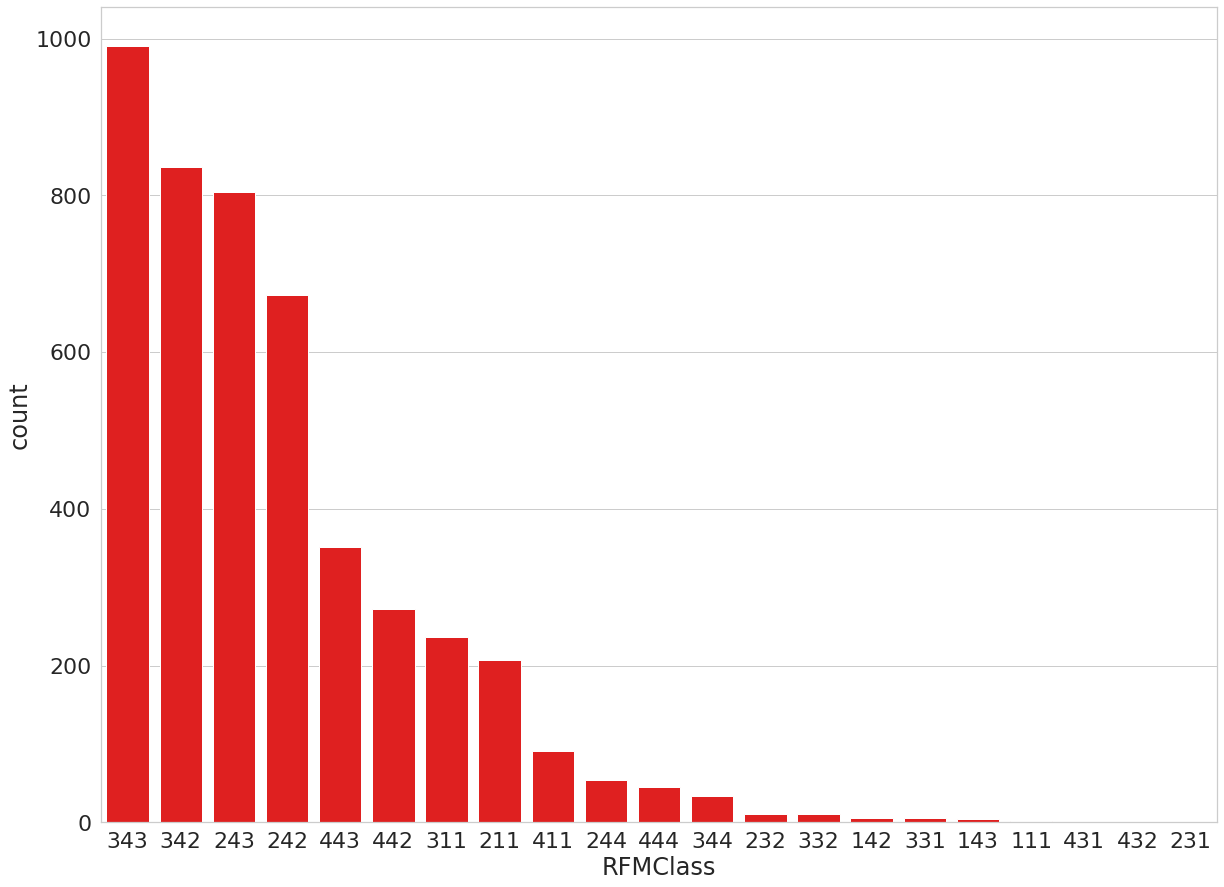

In [61]:
For_barplot = rfmSegmentation.groupby('RFMClass', as_index = False) \
                   .agg(count = ('frequency', 'count')).sort_values('count', ascending = False)
plt.figure(figsize = (20, 15))
ax = sns.barplot(data = For_barplot, x = 'RFMClass', y = 'count', \
                  color='red', alpha= 1)

## Ответ по 5-ому Заданию:
### Мы провели RFM-анализ, сегментировали студентов, которые совершали хотя бы одну попытку сдать экзамен. ТОП 6 групп (по количеству) показали хороший результат, особенно учитывая, что 4 за среднее число очков на экзамене мы присвоили только за 100 баллов